<a href="https://colab.research.google.com/github/jayakhan/document-classification/blob/main/random_forest_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import time
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('english'))
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [2]:
# Adding Dataset into articles and labels list
articles = []
labels = []
with open('/content/20ng-train-stemmed.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    # Filter data based on STOPWORDS
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [3]:
# Clean Label Names
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

In [4]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [6]:
"""This class uses WordNetLemmatizer to stem words with length more than two"""
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if len(t) >= 2]

In [7]:
# Load CountVectorizer API
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content', analyzer='word', tokenizer=LemmaTokenizer(), max_features=2000)

In [8]:
# Convert Articles to their vector sparse representation
X_train_cv = cv.fit_transform(train_articles)
X_test_cv = cv.transform(validation_articles)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_cv, train_labels)

RandomForestClassifier(random_state=0)

In [17]:
y_pred = rfc.predict(X_test_cv)

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(validation_labels, y_pred)))

Model accuracy score with 10 decision-trees : 0.7896


In [19]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train_cv, train_labels)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test_cv)

In [20]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(validation_labels, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7896


In [26]:
# view the feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=cv.get_feature_names()).sort_values(ascending=False)

feature_scores

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


car        0.014844
window     0.013398
sale       0.012573
dod        0.012439
bike       0.012095
             ...   
ottoman    0.000004
fprintf    0.000000
sumgait    0.000000
onam       0.000000
eof        0.000000
Length: 2000, dtype: float64

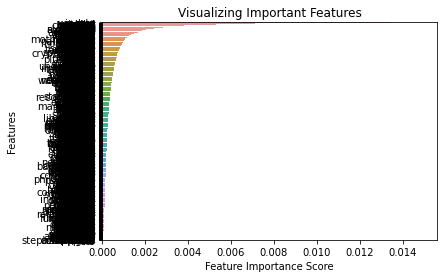

In [27]:
# Creating a seaborn bar plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(validation_labels, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[112   2   0   0   0   0   0   0   0   0   0   0   3   2   2   7   1   0
    2  13]
 [  0 128   7   5   7   6   4   2   0   3   0   0   3   4   4   1   0   0
    1   0]
 [  0   8 136  10   1  10   3   1   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0  12  16 106   8   4  10   1   1   1   1   1   6   3   6   1   0   0
    0   0]
 [  0   3   2  20 126   3   4   0   1   1   0   0   8   3   1   0   1   0
    0   0]
 [  0  12  17   3   0 132   0   1   1   1   0   0   3   1   3   3   1   0
    0   0]
 [  0   4   4   9   6   1 132   2   4   5   1   1   5   0   0   0   1   0
    1   0]
 [  0   3   2   3   2   0   8 136   8   4   0   0   8   2   0   1   1   0
    0   0]
 [  1   3   0   0   0   1   6   7 153   2   1   0   2   1   0   0   1   0
    1   0]
 [  0   4   1   1   1   3   2   4   0 158   3   0   1   1   0   0   0   0
    0   0]
 [  0   2   0   0   1   0   0   2   0  12 160   0   0   3   0   0   0   0
    0   0]
 [  0   2   0   0   0   0   0   0   0   0   0 

In [29]:
from sklearn.metrics import classification_report

print(classification_report(validation_labels, y_pred))

                      precision    recall  f1-score   support

          altatheism       0.87      0.78      0.82       144
        compgraphics       0.63      0.73      0.68       175
 composmswindowsmisc       0.72      0.79      0.75       172
compsysibmpchardware       0.62      0.60      0.61       177
  compsysmachardware       0.80      0.73      0.76       173
        compwindowsx       0.77      0.74      0.75       178
         miscforsale       0.70      0.75      0.72       176
            recautos       0.74      0.76      0.75       178
      recmotorcycles       0.89      0.85      0.87       179
    recsportbaseball       0.81      0.88      0.84       179
      recsporthockey       0.95      0.89      0.92       180
            scicrypt       0.93      0.97      0.95       179
      scielectronics       0.69      0.64      0.67       177
              scimed       0.75      0.89      0.81       178
            scispace       0.84      0.86      0.85       178
socreli